# Analyzing the Stroop Effect

In [1]:
# Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

In [2]:
df = pd.read_csv('stroopdata.csv')

In [5]:
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [6]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


**A) Central Tendency**

1. Mean of congruent = 14.05 and Mean of incongruent = 22.02
2. Median of congruent = 14.35 and Median of incongruent = 21.01
3. Mode of congruent = 22.33 and Mode of incongruent = 35.26

**B) Variability**

1. Standard Deviation of congruent = 3.56 and that of incongruent is 4.80

In [7]:
sns.set(color_codes=True)

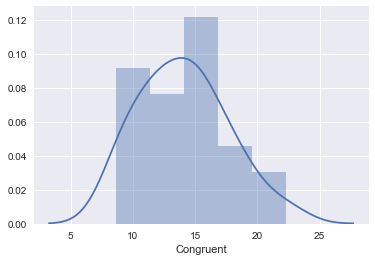

In [8]:
# Visualizations here
sns.distplot(df['Congruent'])
plt.show()

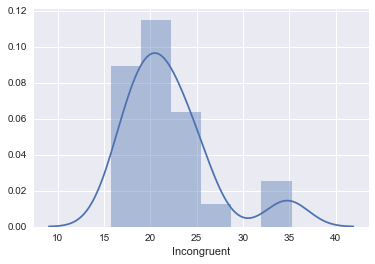

In [9]:
sns.distplot(df['Incongruent'])
plt.show()

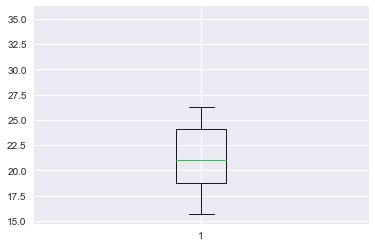

In [10]:
plt.boxplot(df['Incongruent'])
plt.show()

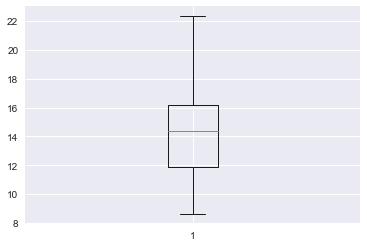

In [11]:
plt.boxplot(df['Congruent'])
plt.show()

The boxplot made more sense than the distribution plot. From the boxplot we can see that the median line is almost in the middle which means the data is not skewed.

# **t-test**

As there are two condition - congruent and incongruent we will consider Paired T test. We will consider a two tailed test as we will look for a deviation in both ways, if any. We assume that the 2nd test result can go either way.

In [12]:
# Getting data for the test

# Sample size
n = df['Congruent'].count()

# Degree of freedom
degree_of_freedom = n - 1

In [13]:
# Two tailed test with aplha (α) = 0.05
# t critical value
stats.t.ppf(1 - 0.025, degree_of_freedom)

2.0686576104190406

In [14]:
# Statistical test here - paired t-test
stats.ttest_rel(df['Congruent'], df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

In [15]:
# Confidence Interval = 0.95
ci = 0.95
stats.t.interval(ci,degree_of_freedom)

(-2.0686576104190406, 2.0686576104190406)

* sample size n = 24
* degree of freedom df = n-1, i.e. 23
* t-critical value using the t-table = 2.069
* t-statistic = -8.02 and pvalue is close to 0.0001
* Confidence interval is (-2.07, 2.07)

## Decision

The pvalue is less than the α so we reject the null hypothesis. This tells that the average time taken by a person when the test condition is changed from congruent to incongruent will vary. The result didn't match up my expectation as I thought there will hardly be an effect on the time.

## Reference

* For Paired t-test refer [here](http://www.statisticshowto.com/probability-and-statistics/t-test/).

* Descriptive Statistics from [Udacity](https://classroom.udacity.com/courses/ud827).

* Inferential Staitstics from [Udacity](https://classroom.udacity.com/courses/ud201).

* Tool to calculate pvalue from [GraphPad Software](https://www.graphpad.com/quickcalcs/).

* Scipy module to caluclate t-staitstics and pvalue from the 
[official document](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html).